# 연습문제

In [4]:
import sys

sys.path.append("../../")
import helper

import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# 성능 측정 지표 모듈 (실제값과 예측값 측정 = 잔차를 통해 성능을 측정하는 것)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

# 문1

In [10]:
# 데이터 가져오기
# 수분함유량 (독립변수) . 강도(종속변수)
df1 = read_excel("https://data.hossam.kr/E04/beans.xlsx")
df1

,수분함유량,강도
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


In [11]:
# 다항식 생성
poly = PolynomialFeatures(include_bias=False)

# 훈련시키기
fit = poly.fit_transform(df1[['수분함유량']])
fit


array([[  36., 1296.],
       [  40., 1600.],
       [  34., 1156.],
       [  44., 1936.],
       [  33., 1089.],
       [  36., 1296.],
       [  40., 1600.],
       [  33., 1089.],
       [  26.,  676.],
       [  36., 1296.]])

In [13]:
# 데이터프레임으로 만들기
x = DataFrame(fit, columns=poly.get_feature_names_out())
x

,수분함유량,수분함유량^2
0,36.0,1296.0
1,40.0,1600.0
2,34.0,1156.0
3,44.0,1936.0
4,33.0,1089.0
5,36.0,1296.0
6,40.0,1600.0
7,33.0,1089.0
8,26.0,676.0
9,36.0,1296.0


In [14]:
# 종속변수만 추출
y = df1[['강도']]
y

,강도
0,29
1,32
2,29
3,40
4,31
5,29
6,34
7,30
8,25
9,31


In [15]:
# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7, 2), (3, 2), (7, 1), (3, 1))

In [16]:
# 회귀분석 수행
# 객체 생성
model = LinearRegression()
# 훈련
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련데이터 설명력: ", fit.score(x_train, y_train))
print("검증데이터 설명력: ", fit.score(x_test, y_test))

계수:  [[-2.05422407  0.04045876]]
절편:  [51.29936854]
훈련데이터 설명력:  0.948987598169573
검증데이터 설명력:  -8.143084034528927


In [35]:
# 훈련데이터 예측값 구하기
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([29.78185993, 25.23966705, 39.24167623, 33.86442786, 33.86442786,
       29.78185993, 28.22608113])

In [36]:
# 검증데이터 예측값 구하기
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([27.56956803, 29.78185993, 27.56956803])

In [19]:
# 설명력 구하기
print("훈련데이터 설명력: ", r2_score(y_train, y_train_pred))
print("검증데이터 설명력: ", r2_score(y_test, y_test_pred))

훈련데이터 설명력:  0.948987598169573
검증데이터 설명력:  -8.143084034528927


In [20]:
# 에러율 구하기
print("훈련데이터_MAE:", mean_absolute_error(y_train, y_train_pred))
print("검증데이터_MAE: ", mean_absolute_error(y_test, y_test_pred))

훈련데이터_MAE: 0.8245585260510643
검증데이터_MAE:  2.214241293532337


In [21]:
print("훈련데이터_MSE:", mean_squared_error(y_train, y_train_pred))
print("검증데이터_MSE: ", mean_squared_error(y_test, y_test_pred))

훈련데이터_MSE: 0.9744409819036656
검증데이터_MSE:  6.0953893563526185


In [22]:
print("훈련데이터_RMSE:", np.sqrt(mean_absolute_error(y_train, y_train_pred)))
print("검증데이터_RMSE: ", np.sqrt(mean_absolute_error(y_test, y_test_pred)))

훈련데이터_RMSE: 0.9080520502983649
검증데이터_RMSE:  1.4880326923600626


In [23]:
print("훈련데이터_MAPE:", np.mean(np.abs((y_train.values - y_train_pred)/y_train.values)) * 100)
print("검증데이터_MAPE: ", np.mean(np.abs((y_test.values - y_test_pred)/y_test.values)) * 100)

훈련데이터_MAPE: 2.6248278332767847
검증데이터_MAPE:  7.287806079908203


In [24]:
print("훈련데이터_MPE:", np.mean((y_train.values - y_train_pred)/y_train.values) * 100)
print("검증데이터_MPE: ", np.mean((y_test.values - y_test_pred)/y_test.values) * 100)

훈련데이터_MPE: -0.08405044961718743
검증데이터_MPE:  5.490426927922783


In [28]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

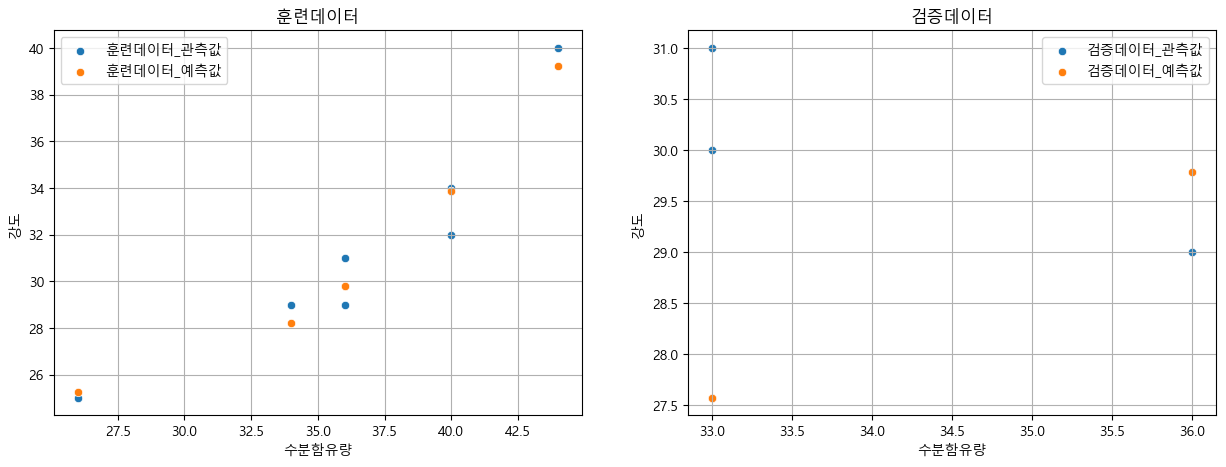

In [38]:
# 관측치와 예측치 시각화 
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

#훈련데이터관측값 + 훈련데이터예측값
sb.scatterplot(x=x_train['수분함유량'], y=y_train['강도'], label='훈련데이터_관측값',ax=ax1)
sb.scatterplot(x=x_train['수분함유량'], y=y_train_pred, label='훈련데이터_예측값', ax=ax1)

ax1.set_title("훈련데이터")
ax1.legend()
ax1.grid()

# 검증데이터관측값 + 검증데이터예측값
sb.scatterplot(x=x_test['수분함유량'], y=y_test['강도'], label='검증데이터_관측값', ax=ax2)
sb.scatterplot(x=x_test['수분함유량'], y=y_test_pred, label='검증데이터_예측값', ax=ax2)

ax2.set_title("검증데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

************
# 문2

In [39]:
# 데이터 가져오기
df2 = read_excel("https://data.hossam.kr/E04/aircon.xlsx")
df2

,예약대수,판매대수
0,19,33
1,23,51
2,26,40
3,29,49
4,30,50
5,38,69
6,39,70
7,46,64
8,49,89
9,58,98


In [40]:
# 다항식 생성
poly = PolynomialFeatures(include_bias=False)
fit = poly.fit_transform(df2[['예약대수']])
fit

array([[  19.,  361.],
       [  23.,  529.],
       [  26.,  676.],
       [  29.,  841.],
       [  30.,  900.],
       [  38., 1444.],
       [  39., 1521.],
       [  46., 2116.],
       [  49., 2401.],
       [  58., 3364.]])

In [45]:
# 데이터프레임으로 만들기
x = DataFrame(fit, columns=poly.get_feature_names_out())
x

,예약대수,예약대수^2
0,19.0,361.0
1,23.0,529.0
2,26.0,676.0
3,29.0,841.0
4,30.0,900.0
5,38.0,1444.0
6,39.0,1521.0
7,46.0,2116.0
8,49.0,2401.0
9,58.0,3364.0


In [42]:
# 종속변수 추출
y = df2[['판매대수']]
y

,판매대수
0,33
1,51
2,40
3,49
4,50
5,69
6,70
7,64
8,89
9,98


In [52]:
# 데이터 분리하기
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(7, 2)

In [56]:
#회귀분석 수행
model = LinearRegression()
# 훈련
fit = model.fit(x_train, y_train)

print("계수:", fit.coef_)
print("절편:", fit.intercept_)
print("훈련데이터_설명력",fit.score(x_train, y_train))
print("검증데이터_설명력",fit.score(x_test, y_test))

계수: [[ 1.72732907e+00 -1.10258345e-03]]
절편: [3.61731765]
훈련데이터_설명력 0.9418315846138151
검증데이터_설명력 0.3583742568809699


In [58]:
# 예측값 생성
# 훈련데이터 예측값
y_train_pred = fit.predict(x_train).reshape(-1)
y_train_pred

# 검증데이터 예측값
y_test_pred = fit.predict(x_test).reshape(-1)
y_test_pred

array([54.44486457, 36.03853731, 80.74138818])

In [59]:
# 설명력
print("훈련데이터_설명력",r2_score(y_train, y_train_pred))
print("검증데이터_설명력",r2_score(y_test, y_test_pred))

훈련데이터_설명력 0.9418315846138151
검증데이터_설명력 0.3583742568809699


In [61]:
# 에러율
print("훈련데이터_MAE:", mean_absolute_error(y_train, y_train_pred))
print("검증데이터_MAE: ", mean_absolute_error(y_test, y_test_pred))

print("훈련데이터_MSE:", mean_squared_error(y_train, y_train_pred))
print("검증데이터_MSE: ", mean_squared_error(y_test, y_test_pred))

print("훈련데이터_RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("검증데이터_RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

print("훈련데이터_MAPE:", np.mean(np.abs((y_train.values - y_train_pred)/y_train.values))*100)
print("검증데이터_MAPE: ", np.mean(np.abs((y_test.values - y_test_pred)/y_test.values))*100)

print("훈련데이터_MPE:", np.mean(((y_train.values - y_train_pred)/y_train.values))*100)
print("검증데이터_MPE: ", np.mean(((y_test.values - y_test_pred)/y_test.values))*100)

훈련데이터_MAE: 3.902407933472026
검증데이터_MAE:  8.074930020670541
훈련데이터_MSE: 22.982459630133462
검증데이터_MSE:  103.08786939445751
훈련데이터_RMSE: 4.794002464552293
검증데이터_RMSE:  10.153219656564982
훈련데이터_MAPE: 35.99688023729883
검증데이터_MAPE:  44.65961496142603
훈련데이터_MPE: -9.59037168599632
검증데이터_MPE:  -25.42792386487005


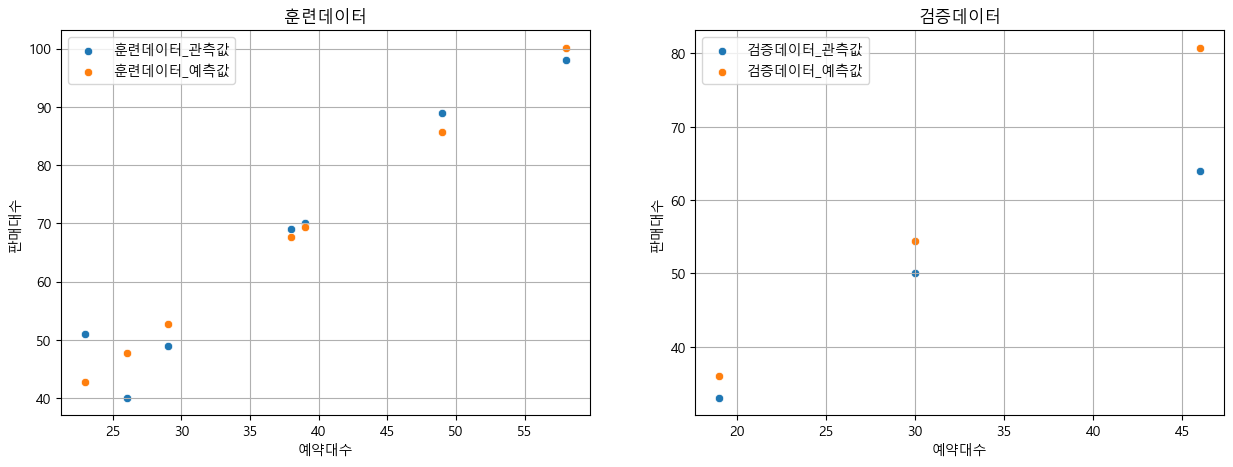

In [65]:
# 시각화
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# 훈련데이터 관측값 + 예측값
sb.scatterplot(x=x_train['예약대수'], y=y_train['판매대수'], label='훈련데이터_관측값', ax=ax1)
sb.scatterplot(x=x_train['예약대수'], y=y_train_pred, label='훈련데이터_예측값', ax=ax1)

ax1.set_title('훈련데이터')
ax1.grid()
ax1.legend()

# 감증데이터 관측값 + 예측값
sb.scatterplot(x=x_test['예약대수'], y=y_test['판매대수'], label='검증데이터_관측값', ax=ax2)
sb.scatterplot(x=x_test['예약대수'], y=y_test_pred, label='검증데이터_예측값', ax=ax2)

ax2.set_title('검증데이터')
ax2.grid()
ax2.legend()


plt.show()
plt.close()

# 문3

In [68]:
#데이터 가져오기
df3 = read_excel("https://data.hossam.kr/E04/galton.xlsx")
df3.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [71]:
# 다항식 생성 및 데이터프레임 만들기
poly = PolynomialFeatures(include_bias = False)
fit = poly.fit_transform(df3[['parent']])
x = DataFrame(fit, columns = poly.get_feature_names_out())
x

,parent,parent^2
0,70.5,4970.25
1,68.5,4692.25
2,65.5,4290.25
3,64.5,4160.25
4,64.0,4096.00
...,...,...
923,69.5,4830.25
924,69.5,4830.25
925,69.5,4830.25
926,69.5,4830.25


In [72]:
# 종속변수 추출
y = df3[['child']]
y.head()

,child
0,61.7
1,61.7
2,61.7
3,61.7
4,61.7


In [79]:
# 훈련/검증데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((649, 2), (279, 2), (649, 1), (279, 1))

In [80]:
# 회귀분석 수행
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수:", fit.coef_)
print("절편:", fit.intercept_)
print("훈련데이터_설명력:", fit.score(x_train, y_train))
print("검증데이터_설명력:", fit.score(x_test, y_test))

계수: [[-6.14018278  0.04983418]]
절편: [254.8071062]
훈련데이터_설명력: 0.21158873072593132
검증데이터_설명력: 0.21619722340979886


In [81]:
# 훈련데이터와 검증데이터의 예측값 생성
y_train_pred = fit.predict(x_train).reshape(-1)
y_train_pred

y_test_pred = fit.predict(x_test).reshape(-1)
y_test_pred

array([66.42620674, 68.03899707, 66.86413516, 67.40173194, 68.03899707,
       67.40173194, 68.77593054, 66.86413516, 66.86413516, 68.03899707,
       68.03899707, 68.03899707, 68.77593054, 68.77593054, 68.03899707,
       68.77593054, 69.61253238, 67.40173194, 70.54880256, 69.61253238,
       68.77593054, 66.42620674, 69.61253238, 66.86413516, 67.40173194,
       68.03899707, 66.42620674, 66.42620674, 68.03899707, 68.03899707,
       67.40173194, 66.86413516, 67.40173194, 68.77593054, 67.40173194,
       68.03899707, 67.40173194, 66.42620674, 65.95619226, 70.54880256,
       67.40173194, 68.03899707, 68.77593054, 68.77593054, 68.77593054,
       68.03899707, 68.03899707, 68.77593054, 67.40173194, 67.40173194,
       67.40173194, 69.61253238, 66.86413516, 68.03899707, 66.42620674,
       66.08794666, 66.86413516, 67.40173194, 67.40173194, 68.77593054,
       66.86413516, 67.40173194, 67.40173194, 68.03899707, 67.40173194,
       66.42620674, 67.40173194, 66.42620674, 68.77593054, 66.86

In [82]:
# 설명력과 에러율
print("훈련데이터_설명력:", r2_score(y_train, y_train_pred))
print("검증데이터_설명력:", r2_score(y_test, y_test_pred))

print("훈련데이터_MAE:", mean_absolute_error(y_train, y_train_pred))
print("검증데이터_MAE: ", mean_absolute_error(y_test, y_test_pred))

print("훈련데이터_MSE:", mean_squared_error(y_train, y_train_pred))
print("검증데이터_MSE: ", mean_squared_error(y_test, y_test_pred))

print("훈련데이터_RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("검증데이터_RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

print("훈련데이터_MAPE:", np.mean(np.abs((y_train.values - y_train_pred)/y_train.values))*100)
print("검증데이터_MAPE: ", np.mean(np.abs((y_test.values - y_test_pred)/y_test.values))*100)

print("훈련데이터_MPE:", np.mean(((y_train.values - y_train_pred)/y_train.values))*100)
print("검증데이터_MPE: ", np.mean(((y_test.values - y_test_pred)/y_test.values))*100)

훈련데이터_설명력: 0.21158873072593132
검증데이터_설명력: 0.21619722340979886
훈련데이터_MAE: 1.788252802476529
검증데이터_MAE:  1.8152110560405572
훈련데이터_MSE: 4.991654433992567
검증데이터_MSE:  4.958742499024318
훈련데이터_RMSE: 2.2342010728653245
검증데이터_RMSE:  2.2268234099327047
훈련데이터_MAPE: 3.2720114628697248
검증데이터_MAPE:  3.3858037503297806
훈련데이터_MPE: -0.13766392526720336
검증데이터_MPE:  -0.03736449807302859


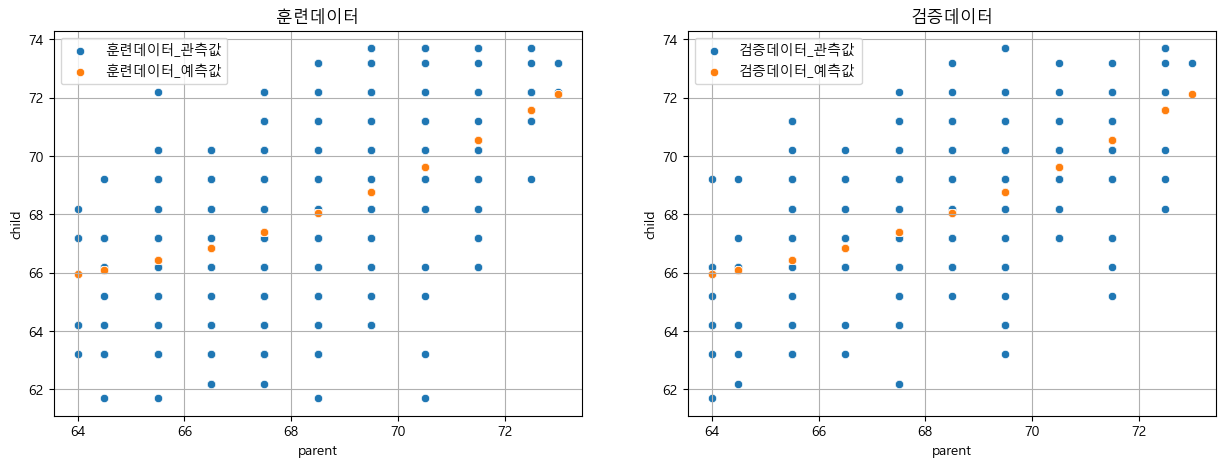

In [84]:
# 시각화
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

#훈련데이터의 관측+예측값
sb.scatterplot(x=x_train['parent'], y=y_train['child'], label='훈련데이터_관측값', ax=ax1)
sb.scatterplot(x=x_train['parent'], y=y_train_pred, label='훈련데이터_예측값', ax=ax1)

ax1.set_title('훈련데이터')
ax1.legend()
ax1.grid()

#검증데이터의 관측+예측값
sb.scatterplot(x=x_test['parent'], y=y_test['child'], label='검증데이터_관측값', ax=ax2)
sb.scatterplot(x=x_test['parent'], y=y_test_pred, label='검증데이터_예측값', ax=ax2)

ax2.set_title('검증데이터')
ax2.legend()
ax2.grid()

plt.show()
plt.close()